In [535]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mat
import statsmodels as sm
from matplotlib import pyplot as plt
from sklearn import metrics
import statsmodels.tsa.holtwinters     as      ets
import statsmodels.tools.eval_measures as      fa
from   sklearn.metrics                 import  mean_squared_error
from   datetime                        import  datetime
print(np.__version__)
print(pd.__version__)
print(sns.__version__)
print(mat.__version__)

1.18.4
1.0.3
0.10.1
3.2.1


In [536]:
## Mean Absolute Percentage - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [537]:
import os
os.chdir('E:/AIMLGLIM/TIME_SERIES_FORECASTING/project')
os.getcwd()

'E:\\AIMLGLIM\\TIME_SERIES_FORECASTING\\project'

In [538]:
df1 = pd.read_csv('rose.csv')
df1.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [539]:
len(df1)

187

In [540]:
date = pd.date_range(start='01/01/1980',freq='M',periods=187)


In [541]:
df1['Time_Stamp'] = pd.to_datetime(date,yearfirst=False,dayfirst=False,format="%")
df1.head()

,YearMonth,Rose,Time_Stamp
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31


In [542]:
df1.set_index(keys='Time_Stamp',drop=True,inplace=True)
df1.tail()

,YearMonth,Rose
Time_Stamp,,
1995-03-31,1995-03,45.0
1995-04-30,1995-04,52.0
1995-05-31,1995-05,28.0
1995-06-30,1995-06,40.0
1995-07-31,1995-07,62.0


In [543]:
df1.drop(labels='YearMonth',axis=1,inplace=True)
df1.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [544]:
df1.index

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', name='Time_Stamp', length=187, freq=None)

In [545]:
df1.Rose

Time_Stamp
1980-01-31    112.0
1980-02-29    118.0
1980-03-31    129.0
1980-04-30     99.0
1980-05-31    116.0
              ...  
1995-03-31     45.0
1995-04-30     52.0
1995-05-31     28.0
1995-06-30     40.0
1995-07-31     62.0
Name: Rose, Length: 187, dtype: float64

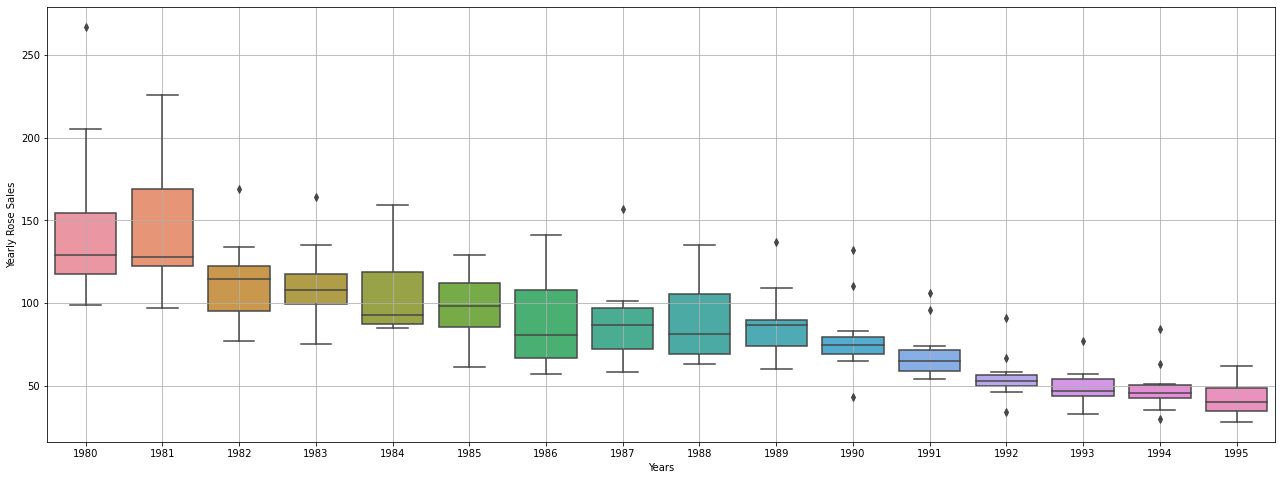

In [546]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df1.index.year, df1.Rose, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Rose Sales');

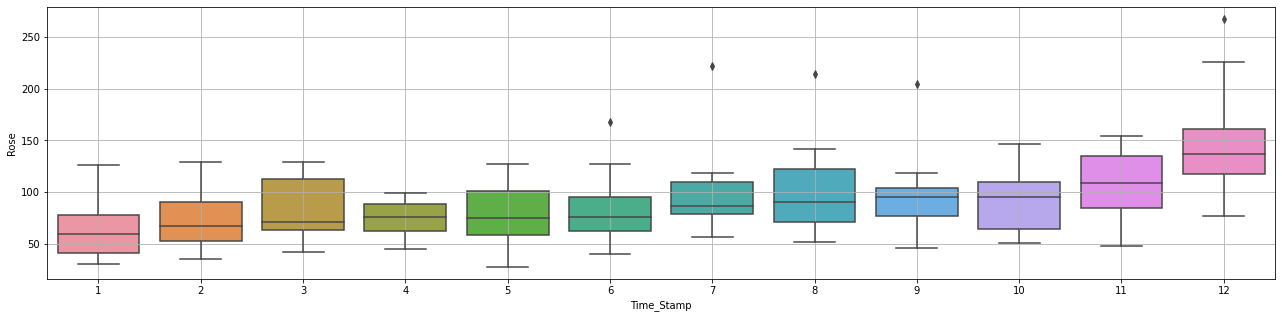

In [547]:
fig, ax = plt.subplots(figsize=(22,5))
sns.boxplot(df1.index.month, df1.Rose, ax=ax,whis=1.5)
plt.grid();

In [548]:
df1_yearly_sum = df1.resample('A').sum()
df1_yearly_sum.head()

,Rose
Time_Stamp,
1980-12-31,1758.0
1981-12-31,1780.0
1982-12-31,1348.0
1983-12-31,1324.0
1984-12-31,1280.0


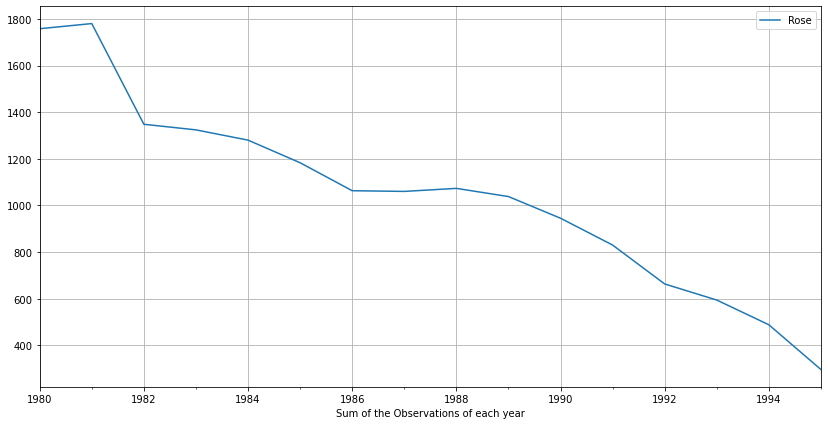

In [549]:
df1_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

In [550]:
df1_yearly_mean = df1.resample('Y').mean()
df1_yearly_mean.head()

,Rose
Time_Stamp,
1980-12-31,146.500000
1981-12-31,148.333333
1982-12-31,112.333333
1983-12-31,110.333333
1984-12-31,106.666667


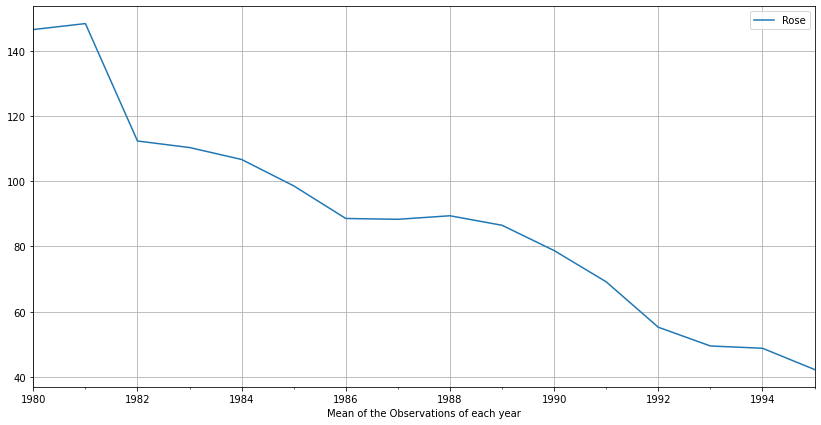

In [551]:
df1_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

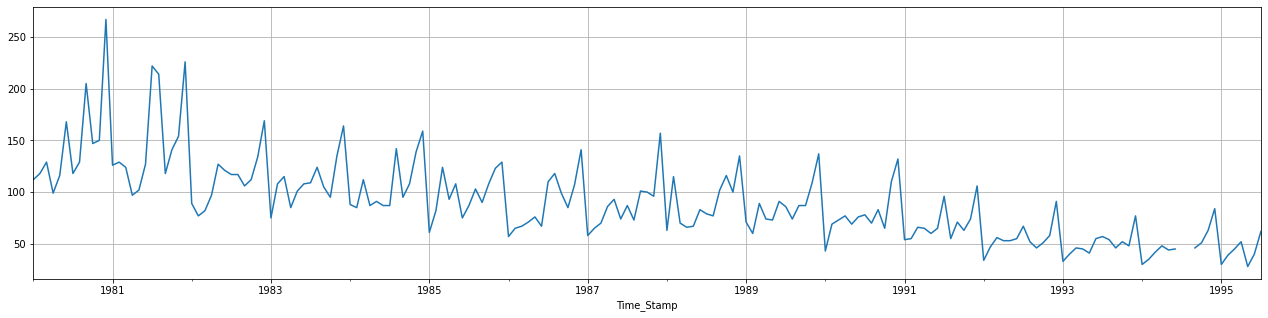

In [552]:
fig, ax = plt.subplots(figsize=(22,5))
df1.Rose.plot()
plt.grid();

In [553]:
df1.isna()

,Rose
Time_Stamp,
1980-01-31,False
1980-02-29,False
1980-03-31,False
1980-04-30,False
1980-05-31,False
...,...
1995-03-31,False
1995-04-30,False
1995-05-31,False


In [554]:
df1[df1.isna().any(axis=1)]

,Rose
Time_Stamp,
1994-07-31,NaN
1994-08-31,NaN


In [555]:
df1['1994']

,Rose
Time_Stamp,
1994-01-31,30.0
1994-02-28,35.0
1994-03-31,42.0
1994-04-30,48.0
1994-05-31,44.0
1994-06-30,45.0
1994-07-31,NaN
1994-08-31,NaN
1994-09-30,46.0


In [556]:
df1['1994']=df1.interpolate(method='spline',order=3)['1994']

In [557]:
df1['1994']

,Rose
Time_Stamp,
1994-01-31,30.000000
1994-02-28,35.000000
1994-03-31,42.000000
1994-04-30,48.000000
1994-05-31,44.000000
1994-06-30,45.000000
1994-07-31,43.693064
1994-08-31,44.326877
1994-09-30,46.000000


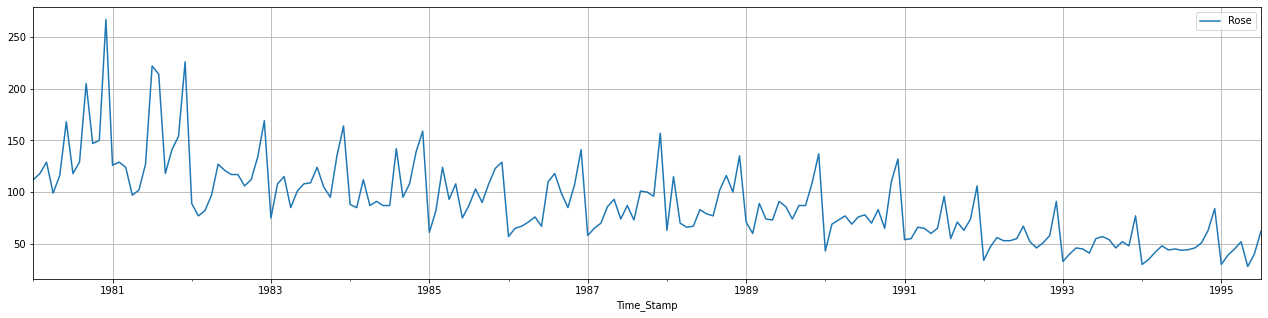

In [558]:
df1.plot(figsize=(22,5))
plt.grid();

In [559]:
from statsmodels.tsa.seasonal import   seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7

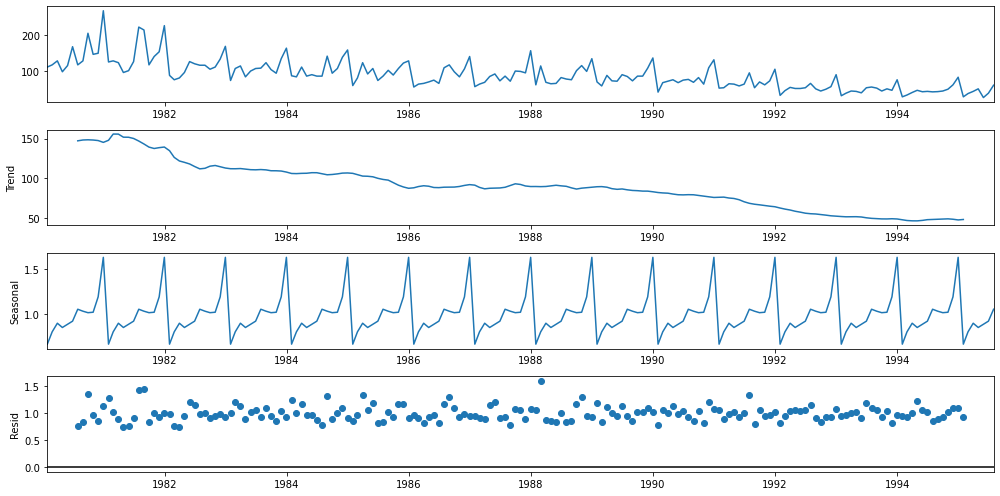

In [560]:
decomposition = seasonal_decompose(df1,model='multiplicative')
decomposition.plot();

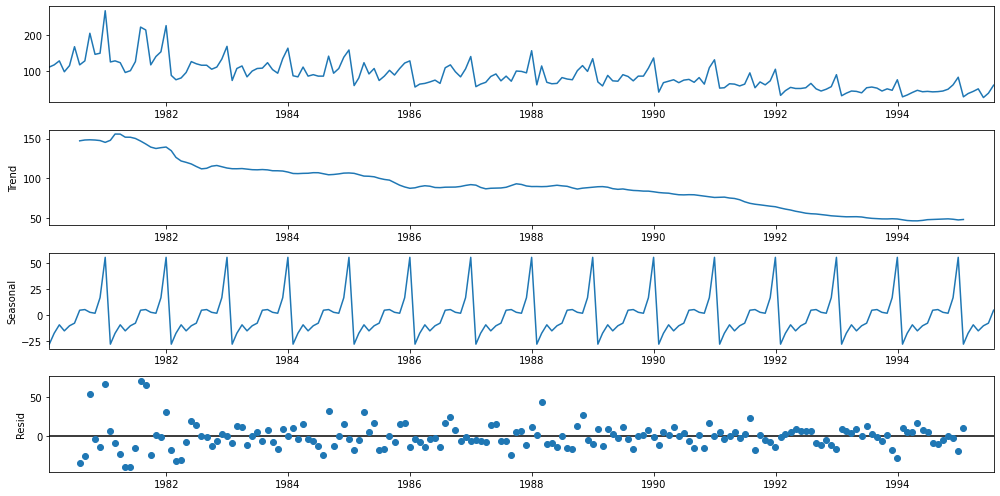

In [561]:
decomposition = seasonal_decompose(df1,model='additive')
decomposition.plot();

In [562]:
train=df1[df1.index.year < 1991]
test=df1[df1.index.year >= 1991]

In [563]:
test.index.year

Int64Index([1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991,
            1991, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992,
            1992, 1992, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993,
            1993, 1993, 1993, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994,
            1994, 1994, 1994, 1994, 1995, 1995, 1995, 1995, 1995, 1995, 1995],
           dtype='int64', name='Time_Stamp')

In [564]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
              Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0 

Last few rows of Training Data 
              Rose
Time_Stamp       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0 

First few rows of Test Data 
             Rose
Time_Stamp      
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0 

Last few rows of Test Data 
             Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0 



In [565]:
train

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0
...,...
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0


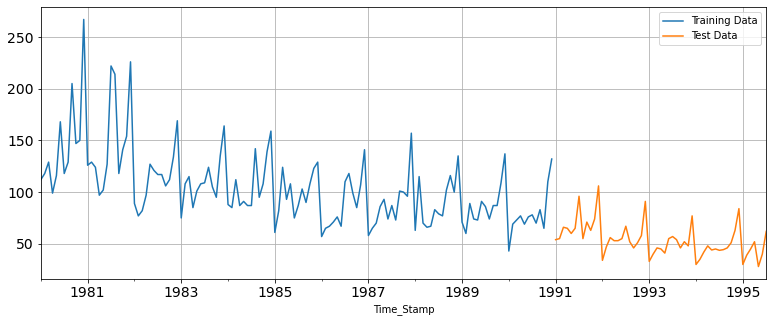

In [566]:

train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [567]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [568]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [569]:
len(test_time)

55

# NAIVE-MODEL

In [570]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [571]:
NaiveModel_train['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_train['naive'].head()

Time_Stamp
1980-01-31    132.0
1980-02-29    132.0
1980-03-31    132.0
1980-04-30    132.0
1980-05-31    132.0
Name: naive, dtype: float64

In [572]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

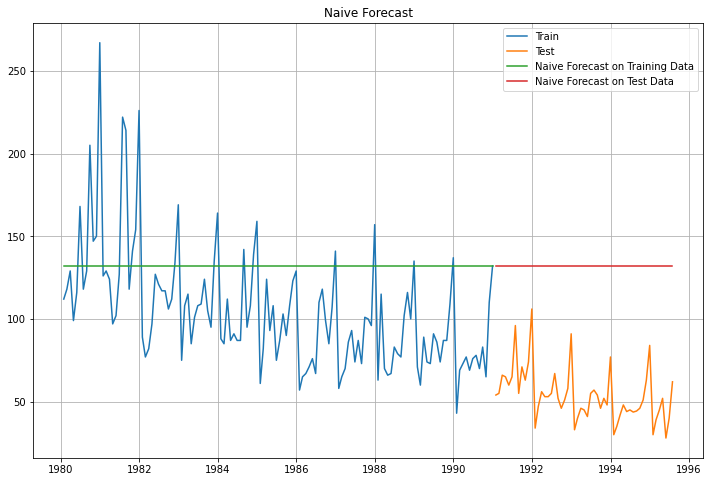

In [573]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [574]:
rmse_model2_train = metrics.mean_squared_error(train['Rose'],NaiveModel_train['naive'],squared=False)
mape_model2_train = MAPE(train['Rose'],NaiveModel_train['naive'])
print("For Naive Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_train, mape_model2_train))

For Naive Model forecast on the Training Data,  RMSE is 45.064 MAPE is 36.38


In [575]:
## Test Data - RMSE and MAPE

rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
mape_model2_test = MAPE(test['Rose'],NaiveModel_test['naive'])
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_test, mape_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.778 MAPE is 145.35


In [576]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test],'Test MAPE': [mape_model2_test]},index=['NaiveModel'])

#resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf = resultsDf_2
resultsDf


,Test RMSE,Test MAPE
NaiveModel,79.778066,145.35


# SIMPLE-AVERAGE

In [577]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [578]:
## Let us get the last value (or the most recent value) of the training set.

SimpleAverage_train['mean_forecast'] = train['Rose'].mean()
SimpleAverage_train.head()

,Rose,mean_forecast
Time_Stamp,,
1980-01-31,112.0,104.939394
1980-02-29,118.0,104.939394
1980-03-31,129.0,104.939394
1980-04-30,99.0,104.939394
1980-05-31,116.0,104.939394


In [579]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
Time_Stamp,,
1991-01-31,54.0,104.939394
1991-02-28,55.0,104.939394
1991-03-31,66.0,104.939394
1991-04-30,65.0,104.939394
1991-05-31,60.0,104.939394


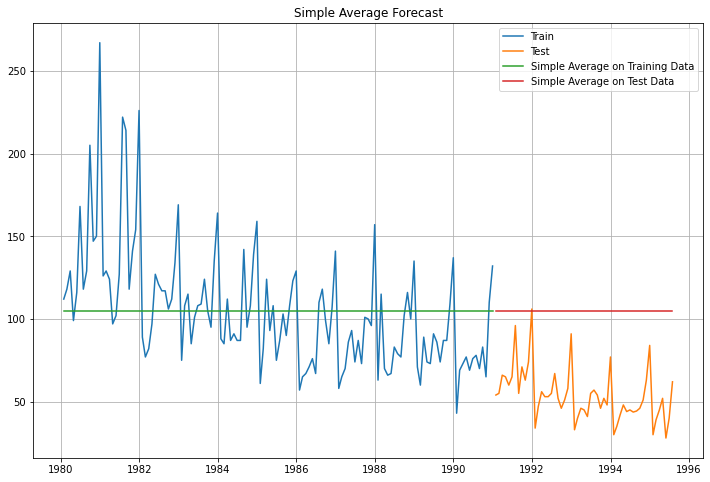

In [580]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [581]:
## Training Data - RMSE and MAPE

rmse_model3_train = metrics.mean_squared_error(train['Rose'],SimpleAverage_train['mean_forecast'],squared=False)
mape_model3_train = MAPE(train['Rose'],SimpleAverage_train['mean_forecast'])
print("For Simple Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_train, mape_model3_train))

For Simple Average Model forecast on the Training Data,  RMSE is 36.034 MAPE is 25.39


In [582]:
## Test Data - RMSE and MAPE

rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
mape_model3_test = MAPE(test['Rose'],SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_test, mape_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.522 MAPE is 95.13


In [583]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test],'Test MAPE': [mape_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE,Test MAPE
NaiveModel,79.778066,145.35
SimpleAverageModel,53.521557,95.13


# LINEAR REGRESSION

In [584]:

LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [585]:

LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187 



In [586]:

from sklearn.linear_model import LinearRegression

In [587]:

lr = LinearRegression()

In [588]:

lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

In [589]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

#### Evaluate this model on the test data using Root Mean Squared Error (RMSE) and Mean Absolute Percentage Error (MAPE)

In [590]:

from sklearn import metrics

In [591]:

## Mean Absolute Percentage - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [592]:

## Test Data - RMSE and MAPE

rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
mape_model1_test = MAPE(test['Rose'],test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_test, mape_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.291 MAPE is 22.94


In [593]:

resultsDf2 = pd.DataFrame({'Test RMSE': [rmse_model1_test],'Test MAPE': [mape_model1_test]},index=['RegressionOnTime'])
resultsDf = pd.concat([resultsDf, resultsDf2])
resultsDf

,Test RMSE,Test MAPE
NaiveModel,79.778066,145.35
SimpleAverageModel,53.521557,95.13
RegressionOnTime,15.291460,22.94


### Model 2: Build a Simple Exponential Smoothing model by taking alpha =1. Then,evaluate the same model on the test set using RMSE and MAPE.

In [594]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [595]:
SES_train = train.copy()
SES_test = test.copy()

In [596]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [597]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [598]:
model_SES_autofit.params

{'smoothing_level': 0.09874989805931945,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 134.38695595667537,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [599]:
test_predictions_model2 = model_SES_autofit.forecast(steps=len(test))
test_predictions_model2

1991-01-31    87.104999
1991-02-28    87.104999
1991-03-31    87.104999
1991-04-30    87.104999
1991-05-31    87.104999
1991-06-30    87.104999
1991-07-31    87.104999
1991-08-31    87.104999
1991-09-30    87.104999
1991-10-31    87.104999
1991-11-30    87.104999
1991-12-31    87.104999
1992-01-31    87.104999
1992-02-29    87.104999
1992-03-31    87.104999
1992-04-30    87.104999
1992-05-31    87.104999
1992-06-30    87.104999
1992-07-31    87.104999
1992-08-31    87.104999
1992-09-30    87.104999
1992-10-31    87.104999
1992-11-30    87.104999
1992-12-31    87.104999
1993-01-31    87.104999
1993-02-28    87.104999
1993-03-31    87.104999
1993-04-30    87.104999
1993-05-31    87.104999
1993-06-30    87.104999
1993-07-31    87.104999
1993-08-31    87.104999
1993-09-30    87.104999
1993-10-31    87.104999
1993-11-30    87.104999
1993-12-31    87.104999
1994-01-31    87.104999
1994-02-28    87.104999
1994-03-31    87.104999
1994-04-30    87.104999
1994-05-31    87.104999
1994-06-30    87

In [600]:
## Test Data - RMSE and MAPE

rmse_model2_test = metrics.mean_squared_error(test['Rose'],test_predictions_model2,squared=False)
mape_model2_test = MAPE(test['Rose'],test_predictions_model2)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_test, mape_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 36.859 MAPE is 64.05


In [601]:

temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model2_test],'Test MAPE': [mape_model2_test]}
                              ,index=['Alpha=1:SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE,Test MAPE
NaiveModel,79.778066,145.35
SimpleAverageModel,53.521557,95.13
RegressionOnTime,15.291460,22.94
Alpha=1:SimpleExponentialSmoothing,36.858586,64.05


# Build a Simple Exponential Smoothing model by taking the best alpha [in the range of 0.01 to 1 taking an interval of 0.01] in terms of the least RMSE. Then,evaluate the same model on the test data. Also, do make sure that 'optimized = False' within the '.fit()' command.

In [602]:
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Test RMSE': [],'Test MAPE': []})
resultsDf_model

,Alpha Values,Test RMSE,Test MAPE


In [603]:
for i in np.arange(0.01,1,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model2_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    mape_model2_test_i = MAPE(SES_test['Rose'],SES_test['predict',i])
    
    resultsDf_model = resultsDf_model.append({'Alpha Values':i
                                              ,'Test RMSE':rmse_model2_test_i
                                              ,'Test MAPE':mape_model2_test_i}, ignore_index=True)

In [604]:
resultsDf_model

,Alpha Values,Test RMSE,Test MAPE
0,0.01,50.667781,89.76
1,0.02,43.768690,76.74
2,0.03,39.963339,69.69
3,0.04,38.023924,66.17
4,0.05,37.073778,64.44
...,...,...,...
94,0.95,78.592049,143.10
95,0.96,78.846224,143.58
96,0.97,79.092013,144.05
97,0.98,79.329319,144.50


In [605]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Test RMSE,Test MAPE
6,0.07,36.498138,63.38
7,0.08,36.525330,63.43
5,0.06,36.642827,63.65
8,0.09,36.666474,63.69
9,0.10,36.890375,64.10
...,...,...,...
94,0.95,78.592049,143.10
95,0.96,78.846224,143.58
96,0.97,79.092013,144.05
97,0.98,79.329319,144.50


In [606]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [resultsDf_model.iloc[1:2,0:3].values[0][1]]
                               ,'Test MAPE': [resultsDf_model.iloc[1:2,0:3].values[0][2]]}
                              ,index=['Alpha=0.07,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE,Test MAPE
NaiveModel,79.778066,145.35
SimpleAverageModel,53.521557,95.13
RegressionOnTime,15.291460,22.94
Alpha=1:SimpleExponentialSmoothing,36.858586,64.05
"Alpha=0.07,SimpleExponentialSmoothing",43.768690,76.74


#### Model 3: Build a Double Exponential Smoothing model by using the parameter 'optimise=True' within the '.fit()' function. Then,evaluate the same model on the test set using RMSE and MAPE.¶

In [607]:

DES_train = train.copy()
DES_test = test.copy()

In [608]:
model_DES = Holt(SES_train['Rose'])

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [609]:

model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [610]:

model_DES_autofit.params_formatted

,name,param,optimized
smoothing_level,alpha,0.157895,True
smoothing_slope,beta,0.157895,True
initial_level,l.0,112.000000,True
initial_slope,b.0,6.000000,True


In [611]:
test_predictions_model3 = model_DES_autofit.forecast(steps=len(test))
test_predictions_model3

1991-01-31     86.863579
1991-02-28     88.028056
1991-03-31     89.192534
1991-04-30     90.357011
1991-05-31     91.521488
1991-06-30     92.685966
1991-07-31     93.850443
1991-08-31     95.014921
1991-09-30     96.179398
1991-10-31     97.343876
1991-11-30     98.508353
1991-12-31     99.672831
1992-01-31    100.837308
1992-02-29    102.001785
1992-03-31    103.166263
1992-04-30    104.330740
1992-05-31    105.495218
1992-06-30    106.659695
1992-07-31    107.824173
1992-08-31    108.988650
1992-09-30    110.153127
1992-10-31    111.317605
1992-11-30    112.482082
1992-12-31    113.646560
1993-01-31    114.811037
1993-02-28    115.975515
1993-03-31    117.139992
1993-04-30    118.304469
1993-05-31    119.468947
1993-06-30    120.633424
1993-07-31    121.797902
1993-08-31    122.962379
1993-09-30    124.126857
1993-10-31    125.291334
1993-11-30    126.455811
1993-12-31    127.620289
1994-01-31    128.784766
1994-02-28    129.949244
1994-03-31    131.113721
1994-04-30    132.278199


In [612]:

## Test Data - RMSE and MAPE

rmse_model3_test = metrics.mean_squared_error(test['Rose'],test_predictions_model3,squared=False)
mape_model3_test = MAPE(test['Rose'],test_predictions_model3)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_test, mape_model3_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 70.643 MAPE is 120.47


In [613]:

temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model3_test],'Test MAPE': [mape_model3_test]}
                              ,index=['Alpha=0.158,Beta=0.158:DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE,Test MAPE
NaiveModel,79.778066,145.35
SimpleAverageModel,53.521557,95.13
RegressionOnTime,15.291460,22.94
Alpha=1:SimpleExponentialSmoothing,36.858586,64.05
"Alpha=0.07,SimpleExponentialSmoothing",43.768690,76.74
"Alpha=0.158,Beta=0.158:DoubleExponentialSmoothing",70.642717,120.47


### Model 4: Build a Triple Exponential Smoothing model by using the parameter 'optimise=True' within the '.fit()' function. Then,evaluate the same model on the test set using RMSE and MAPE

In [614]:
TES_train = train.copy()
TES_test = test.copy()

In [615]:
model_TES = ExponentialSmoothing(SES_train['Rose'],trend='additive',seasonal='multiplicative')

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [616]:
model_TES_autofit = model_TES.fit(optimized=True,use_brute=True)

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [617]:

model_TES_autofit.params

{'smoothing_level': 0.10609628211044227,
 'smoothing_slope': 0.04843853483296353,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 76.65565233828687,
 'initial_slope': 0.0,
 'initial_seasons': array([1.47550285, 1.65927166, 1.80572675, 1.58888842, 1.77822733,
        1.92604398, 2.11649492, 2.25135237, 2.11690636, 2.08112883,
        2.40927327, 3.30448211]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [618]:

test_predictions_model4 = model_TES_autofit.forecast(steps=len(test))
test_predictions_model4

1991-01-31     56.674334
1991-02-28     63.471272
1991-03-31     68.788792
1991-04-30     60.277823
1991-05-31     67.180378
1991-06-30     72.461079
1991-07-31     79.292413
1991-08-31     83.989692
1991-09-30     78.640182
1991-10-31     76.982915
1991-11-30     88.741360
1991-12-31    121.193714
1992-01-31     53.882208
1992-02-29     60.331396
1992-03-31     65.371776
1992-04-30     57.271135
1992-05-31     63.815399
1992-06-30     68.816384
1992-07-31     75.287323
1992-08-31     79.729408
1992-09-30     74.634314
1992-10-31     73.044750
1992-11-30     84.182240
1992-12-31    114.940570
1993-01-31     51.090082
1993-02-28     57.191520
1993-03-31     61.954760
1993-04-30     54.264446
1993-05-31     60.450421
1993-06-30     65.171688
1993-07-31     71.282233
1993-08-31     75.469125
1993-09-30     70.628445
1993-10-31     69.106584
1993-11-30     79.623119
1993-12-31    108.687427
1994-01-31     48.297955
1994-02-28     54.051644
1994-03-31     58.537743
1994-04-30     51.257758


In [619]:
## Test Data - RMSE and MAPE

rmse_model4_test = metrics.mean_squared_error(test['Rose'],test_predictions_model4,squared=False)
mape_model4_test = MAPE(test['Rose'],test_predictions_model4)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test, mape_model4_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 17.445 MAPE is 29.01


In [620]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model4_test],'Test MAPE': [mape_model4_test]}
                              ,index=['Alpha=0.11,Beta=0.05,Gamma=0.000: TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE,Test MAPE
NaiveModel,79.778066,145.35
SimpleAverageModel,53.521557,95.13
RegressionOnTime,15.291460,22.94
Alpha=1:SimpleExponentialSmoothing,36.858586,64.05
"Alpha=0.07,SimpleExponentialSmoothing",43.768690,76.74
"Alpha=0.158,Beta=0.158:DoubleExponentialSmoothing",70.642717,120.47
"Alpha=0.11,Beta=0.05,Gamma=0.000: TripleExponentialSmoothing",17.445169,29.01


### Model 6: Build a Double Exponential Smoothing model by taking the best alpha and beta [both in the range of 0.01 to 1 taking an interval of 0.01] in terms of the least RMSE. Then,evaluate the same model on the test data. Also, do make sure that 'optimized = False' within the '.fit()' command.

In [621]:

DES_train = train.copy()
DES_test = test.copy()

In [622]:
model_DES = Holt(DES_train['Rose'])

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [623]:
resultsDf_model.iloc[1:2,0:3].values[0][2]

76.74

In [624]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_model = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Test RMSE': [],'Test MAPE': []})
resultsDf_model

,Alpha Values,Beta Values,Test RMSE,Test MAPE


In [625]:
for i in np.arange(0.01,1,0.01):
    for j in np.arange(0.01,1,0.01):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        
        rmse_model4_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        mape_model4_test = MAPE(DES_test['Rose'],DES_test['predict',i,j])
        
        resultsDf_model = resultsDf_model.append({'Alpha Values':i,'Beta Values':j
                                          ,'Test RMSE':rmse_model4_test
                                          ,'Test MAPE':mape_model4_test}, ignore_index=True)

In [626]:
resultsDf_model

,Alpha Values,Beta Values,Test RMSE,Test MAPE
0,0.01,0.01,450.311022,831.28
1,0.01,0.02,282.215879,523.42
2,0.01,0.03,151.888634,279.37
3,0.01,0.04,62.092124,97.21
4,0.01,0.05,57.353932,86.60
...,...,...,...,...
9796,0.99,0.95,835.212125,1379.52
9797,0.99,0.96,830.352493,1371.66
9798,0.99,0.97,825.129892,1363.21
9799,0.99,0.98,819.539382,1354.16


In [627]:

resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Beta Values,Test RMSE,Test MAPE
343,0.04,0.47,14.578596,20.07
222,0.03,0.25,14.697575,20.56
262,0.03,0.65,14.726856,18.78
300,0.04,0.04,14.887555,18.70
342,0.04,0.46,14.899141,19.10
...,...,...,...,...
6731,0.68,0.99,1118.401524,1835.88
7127,0.72,0.99,1118.536981,1836.73
6830,0.69,0.99,1119.168601,1837.29
7028,0.71,0.99,1119.252134,1837.74


In [628]:

temp_resultsDf = pd.DataFrame({'Test RMSE': [resultsDf_model.iloc[0:1,].values[0][2]]
                               ,'Test MAPE': [resultsDf_model.iloc[0:1,].values[0][3]]}
                              ,index=['Alpha=0.04,Beta=0.47,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE,Test MAPE
NaiveModel,79.778066,145.35
SimpleAverageModel,53.521557,95.13
RegressionOnTime,15.291460,22.94
Alpha=1:SimpleExponentialSmoothing,36.858586,64.05
"Alpha=0.07,SimpleExponentialSmoothing",43.768690,76.74
"Alpha=0.158,Beta=0.158:DoubleExponentialSmoothing",70.642717,120.47
"Alpha=0.11,Beta=0.05,Gamma=0.000: TripleExponentialSmoothing",17.445169,29.01
"Alpha=0.04,Beta=0.47,DoubleExponentialSmoothing",450.311022,831.28


### Model 7: Build a Triple Exponential Smoothing model by taking the best alpha, beta and gamma [all in the range of 0.1 to 1 taking an interval of 0.1] in terms of the least RMSE. Then,evaluate the same model on the test data. Also, do make sure that 'optimized = False' within the '.fit()' command.

In [629]:

TES_train = train.copy()
TES_test = test.copy()

In [630]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_model = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Test RMSE': [],'Test MAPE': []})
resultsDf_model

,Alpha Values,Beta Values,Gamma Values,Test RMSE,Test MAPE


In [631]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
                
            rmse_model6_test_2 = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            mape_model6_test_2 = MAPE(TES_test['Rose'],TES_test['predict',i,j,k])
        
            resultsDf_model = resultsDf_model.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k
                                                  ,'Test RMSE':rmse_model6_test_2
                                                  ,'Test MAPE':mape_model6_test_2}, ignore_index=True)

In [632]:
resultsDf_model

,Alpha Values,Beta Values,Gamma Values,Test RMSE,Test MAPE
0,0.1,0.1,0.1,12.827131,20.28
1,0.1,0.1,0.2,11.955885,18.76
2,0.1,0.1,0.3,11.888892,18.47
3,0.1,0.1,0.4,12.167489,18.87
4,0.1,0.1,0.5,12.675513,19.64
...,...,...,...,...,...
995,1.0,1.0,0.6,9603.641743,7820.66
996,1.0,1.0,0.7,23029.955505,11848.08
997,1.0,1.0,0.8,9626.695041,8589.55
998,1.0,1.0,0.9,9691.903861,7924.06


In [633]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Beta Values,Gamma Values,Test RMSE,Test MAPE
11,0.1,0.2,0.2,9.665739e+00,14.08
10,0.1,0.2,0.1,9.954136e+00,14.50
12,0.1,0.2,0.3,9.961876e+00,14.33
142,0.2,0.5,0.3,1.000293e+01,14.25
151,0.2,0.6,0.2,1.000575e+01,13.53
...,...,...,...,...,...
965,1.0,0.7,0.6,9.860190e+05,470146.26
195,0.2,1.0,0.6,1.217531e+06,642748.00
564,0.6,0.7,0.5,1.793268e+06,825649.47
964,1.0,0.7,0.5,2.819593e+06,1369557.30


In [634]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [9.665739e+00]
                               ,'Test MAPE': [14.08]}
                              ,index=['Alpha=0.1,Beta=0.2,Gamma=0.2:Triple ExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE,Test MAPE
NaiveModel,79.778066,145.35
SimpleAverageModel,53.521557,95.13
RegressionOnTime,15.291460,22.94
Alpha=1:SimpleExponentialSmoothing,36.858586,64.05
"Alpha=0.07,SimpleExponentialSmoothing",43.768690,76.74
"Alpha=0.158,Beta=0.158:DoubleExponentialSmoothing",70.642717,120.47
"Alpha=0.11,Beta=0.05,Gamma=0.000: TripleExponentialSmoothing",17.445169,29.01
"Alpha=0.04,Beta=0.47,DoubleExponentialSmoothing",450.311022,831.28
"Alpha=0.1,Beta=0.2,Gamma=0.2:Triple ExponentialSmoothing",9.665739,14.08


# MOVING AVERAGES

In [648]:
MovingAverage = df1.copy()
MovingAverage.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [649]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,112.0,NaN,NaN,NaN,NaN
1980-02-29,118.0,115.0,NaN,NaN,NaN
1980-03-31,129.0,123.5,NaN,NaN,NaN
1980-04-30,99.0,114.0,114.5,NaN,NaN
1980-05-31,116.0,107.5,115.5,NaN,NaN


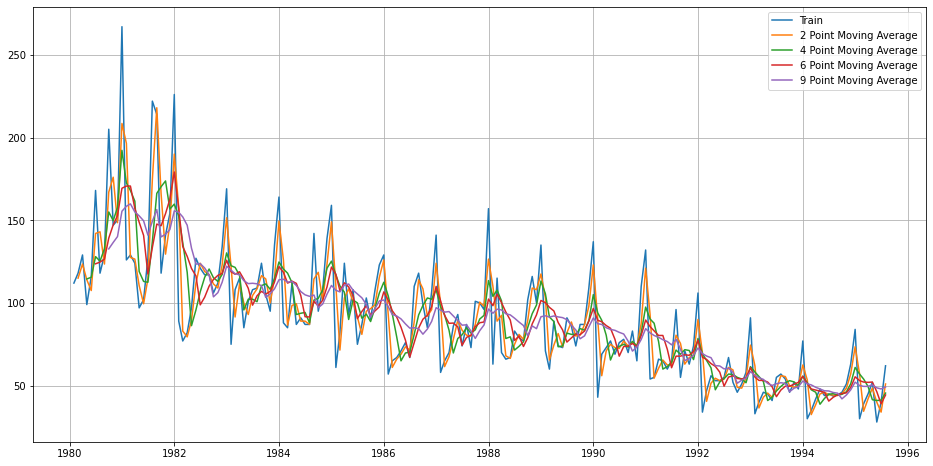

In [650]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [651]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)-2] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7)+2:]

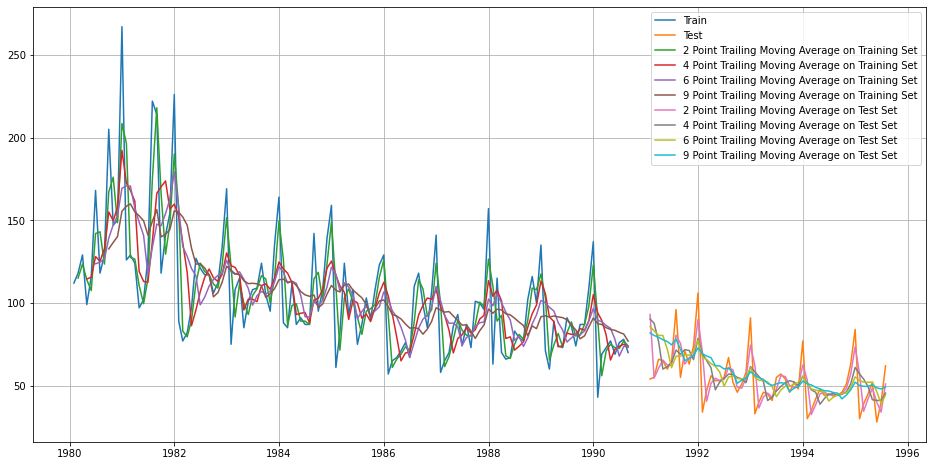

In [652]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [653]:
trailing_MovingAverage_test['Trailing_2'].size

55

In [654]:
## Test Data - RMSE and MAPE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
mape_model4_test_2 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_2, mape_model4_test_2))



For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.530 MAPE is 13.60


In [655]:
## Test Data - RMSE and MAPE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
mape_model4_test_4 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_4, mape_model4_test_4))

## Test Data - RMSE and MAPE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
mape_model4_test_6 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_6, mape_model4_test_6))

## Test Data - RMSE and MAPE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
mape_model4_test_9 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_9, mape_model4_test_9))

For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.462 MAPE is 19.59
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.587 MAPE is 20.83
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.740 MAPE is 21.13


In [656]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]
                            ,'Test MAPE': [mape_model4_test_2,mape_model4_test_4,mape_model4_test_6
                                           ,mape_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE,Test MAPE
NaiveModel,79.778066,145.35
SimpleAverageModel,53.521557,95.13
RegressionOnTime,15.291460,22.94
Alpha=1:SimpleExponentialSmoothing,36.858586,64.05
"Alpha=0.07,SimpleExponentialSmoothing",43.768690,76.74
"Alpha=0.158,Beta=0.158:DoubleExponentialSmoothing",70.642717,120.47
"Alpha=0.11,Beta=0.05,Gamma=0.000: TripleExponentialSmoothing",17.445169,29.01
"Alpha=0.04,Beta=0.47,DoubleExponentialSmoothing",450.311022,831.28
"Alpha=0.1,Beta=0.2,Gamma=0.2:Triple ExponentialSmoothing",9.665739,14.08
2pointTrailingMovingAverage,11.530180,13.60


In [657]:

## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

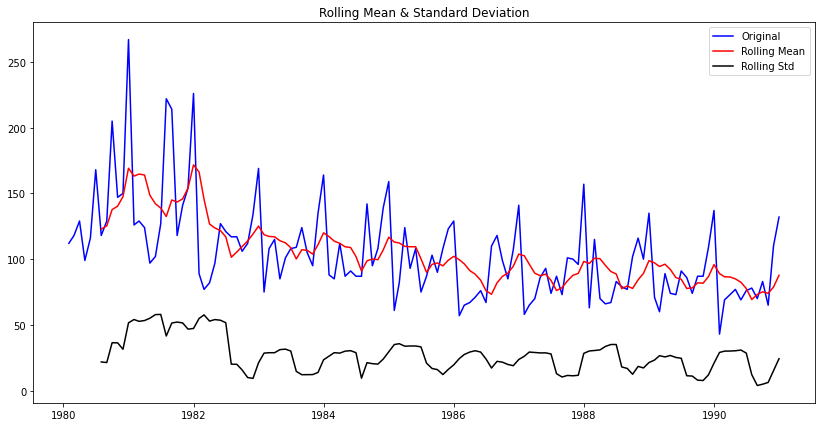

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [658]:
test_stationarity(train['Rose'])

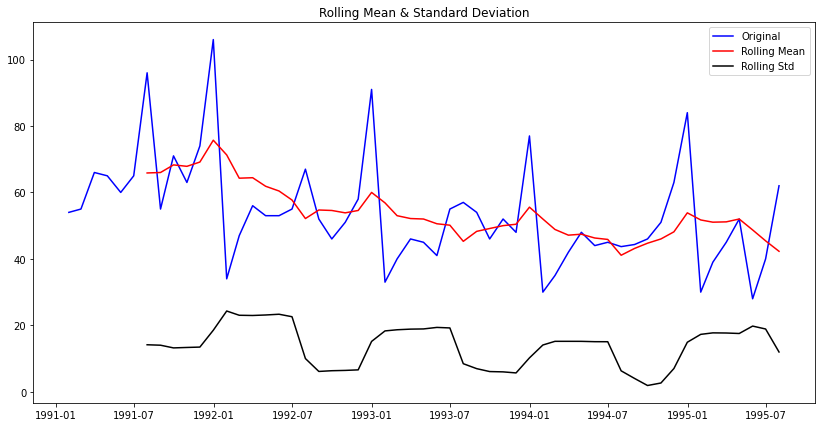

Results of Dickey-Fuller Test:
Test Statistic                 -4.333930
p-value                         0.000388
#Lags Used                     11.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64 



In [659]:
test_stationarity(test['Rose'])

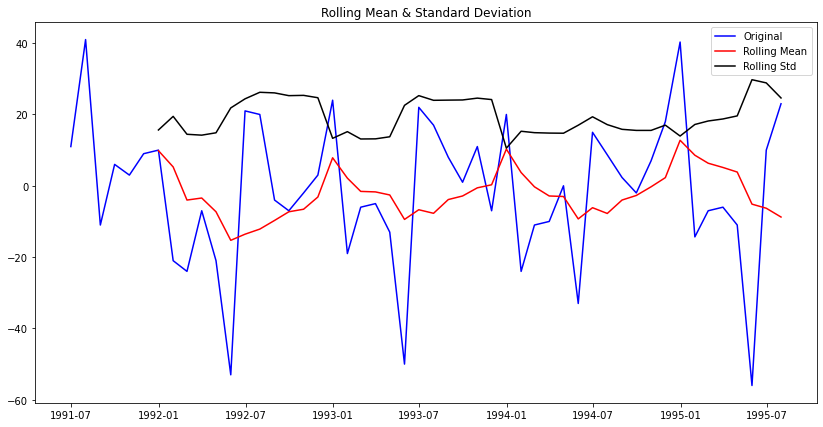

Results of Dickey-Fuller Test:
Test Statistic                 -1.102223
p-value                         0.714185
#Lags Used                     11.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64 



In [704]:
test_stationarity(test.diff(5).dropna())

In [705]:
test_diff = test.diff(periods=5).dropna()
test_diff

,Rose
Time_Stamp,
1991-06-30,11.000000
1991-07-31,41.000000
1991-08-31,-11.000000
1991-09-30,6.000000
1991-10-31,3.000000
1991-11-30,9.000000
1991-12-31,10.000000
1992-01-31,-21.000000
1992-02-29,-24.000000


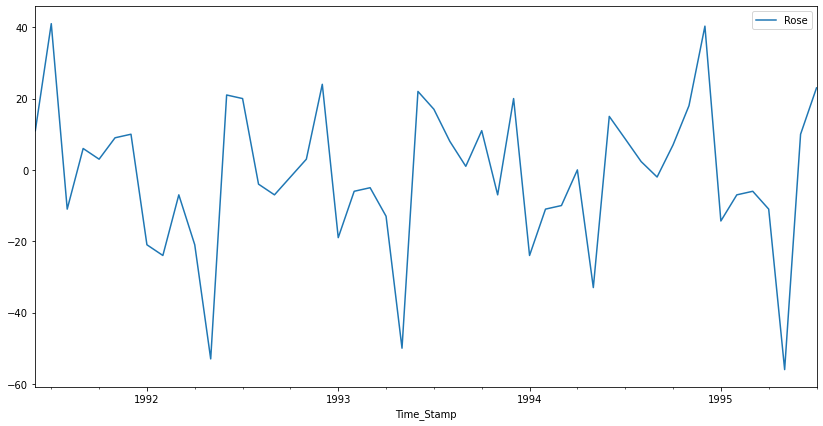

In [706]:
test_diff.plot();

In [707]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

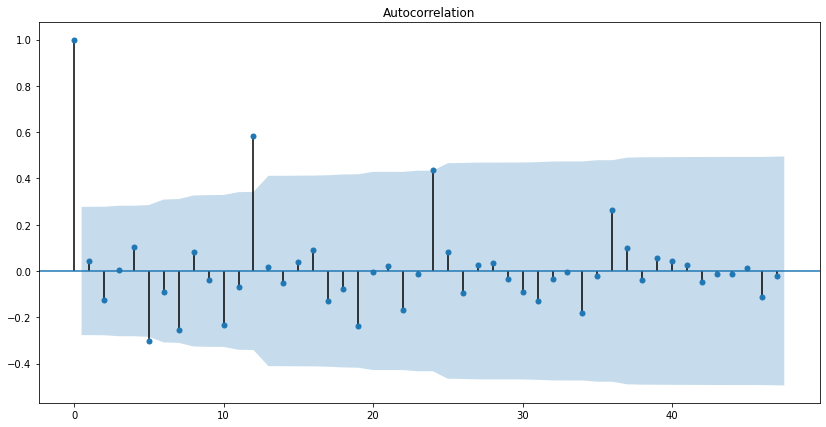

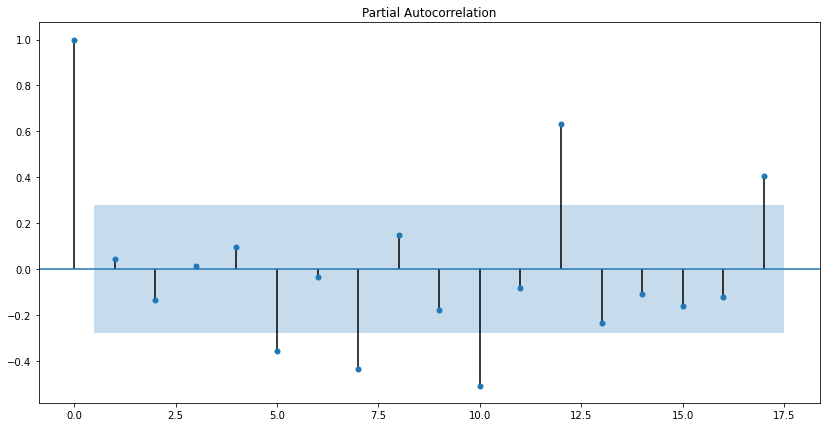

In [708]:
plot_acf(test_diff,lags=47)
plot_pacf(test_diff);

#### Build an Automated version of an ARIMA model on the training data for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [709]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [710]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [711]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)



ARIMA(0, 1, 0) - AIC:1333.154672912435
ARIMA(0, 1, 1) - AIC:1282.3098319748287
ARIMA(0, 1, 2) - AIC:1279.671528853577
ARIMA(1, 1, 0) - AIC:1317.350310538145
ARIMA(1, 1, 1) - AIC:1280.5742295380066
ARIMA(1, 1, 2) - AIC:1279.8707234231913
ARIMA(2, 1, 0) - AIC:1298.6110341604938
ARIMA(2, 1, 1) - AIC:1281.5078621868606
ARIMA(2, 1, 2) - AIC:1281.8707222264325


In [712]:

## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
2,"(0, 1, 2)",1279.671529
5,"(1, 1, 2)",1279.870723
4,"(1, 1, 1)",1280.574230
7,"(2, 1, 1)",1281.507862
8,"(2, 1, 2)",1281.870722
1,"(0, 1, 1)",1282.309832
6,"(2, 1, 0)",1298.611034
3,"(1, 1, 0)",1317.350311
0,"(0, 1, 0)",1333.154673


In [713]:
mod = ARIMA(train['Rose'], order=(0,1,2))

results_Arima = mod.fit()

print(results_Arima.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -636.836
Date:                Sun, 23 Aug 2020   AIC                           1279.672
Time:                        21:27:40   BIC                           1288.297
Sample:                    01-31-1980   HQIC                          1283.176
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6970      0.072     -9.689      0.000      -0.838      -0.556
ma.L2         -0.2042      0.073     -2.794      0.005      -0.347      -0.061
sigma2       965.8407     88.305     10.938      0.0

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [714]:
## Mean Absolute Percentage - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [715]:
results_Arima

In [716]:
from sklearn.metrics import mean_squared_error

In [717]:

predicted_autoARIMA = results_Arima.forecast(steps=len(test))
predicted_autoARIMA

1991-01-31    96.026636
1991-02-28    87.495114
1991-03-31    87.495114
1991-04-30    87.495114
1991-05-31    87.495114
1991-06-30    87.495114
1991-07-31    87.495114
1991-08-31    87.495114
1991-09-30    87.495114
1991-10-31    87.495114
1991-11-30    87.495114
1991-12-31    87.495114
1992-01-31    87.495114
1992-02-29    87.495114
1992-03-31    87.495114
1992-04-30    87.495114
1992-05-31    87.495114
1992-06-30    87.495114
1992-07-31    87.495114
1992-08-31    87.495114
1992-09-30    87.495114
1992-10-31    87.495114
1992-11-30    87.495114
1992-12-31    87.495114
1993-01-31    87.495114
1993-02-28    87.495114
1993-03-31    87.495114
1993-04-30    87.495114
1993-05-31    87.495114
1993-06-30    87.495114
1993-07-31    87.495114
1993-08-31    87.495114
1993-09-30    87.495114
1993-10-31    87.495114
1993-11-30    87.495114
1993-12-31    87.495114
1994-01-31    87.495114
1994-02-28    87.495114
1994-03-31    87.495114
1994-04-30    87.495114
1994-05-31    87.495114
1994-06-30    87

In [718]:
predicted_autoARIMA.tail()

1995-03-31    87.495114
1995-04-30    87.495114
1995-05-31    87.495114
1995-06-30    87.495114
1995-07-31    87.495114
Freq: M, dtype: float64

In [719]:
results_Arima.predict(start=pd.to_datetime('1991-01-31'),end=pd.to_datetime('1995-07-31'),typ = 'level',dynamic=True,full_results=True)

1991-01-31    96.026636
1991-02-28    87.495114
1991-03-31    87.495114
1991-04-30    87.495114
1991-05-31    87.495114
1991-06-30    87.495114
1991-07-31    87.495114
1991-08-31    87.495114
1991-09-30    87.495114
1991-10-31    87.495114
1991-11-30    87.495114
1991-12-31    87.495114
1992-01-31    87.495114
1992-02-29    87.495114
1992-03-31    87.495114
1992-04-30    87.495114
1992-05-31    87.495114
1992-06-30    87.495114
1992-07-31    87.495114
1992-08-31    87.495114
1992-09-30    87.495114
1992-10-31    87.495114
1992-11-30    87.495114
1992-12-31    87.495114
1993-01-31    87.495114
1993-02-28    87.495114
1993-03-31    87.495114
1993-04-30    87.495114
1993-05-31    87.495114
1993-06-30    87.495114
1993-07-31    87.495114
1993-08-31    87.495114
1993-09-30    87.495114
1993-10-31    87.495114
1993-11-30    87.495114
1993-12-31    87.495114
1994-01-31    87.495114
1994-02-28    87.495114
1994-03-31    87.495114
1994-04-30    87.495114
1994-05-31    87.495114
1994-06-30    87

In [720]:
RMSE_autoARIMA = mean_squared_error(test['Rose'],predicted_autoARIMA,squared=False)
MAPE_autoARIMA = MAPE(test['Rose'],predicted_autoARIMA)

print('RMSE for the autofit ARIMA model:',RMSE_autoARIMA,'\nMAPE for the autofit ARIMA model:',MAPE_autoARIMA)

RMSE for the autofit ARIMA model: 37.36853808919248 
MAPE for the autofit ARIMA model: 64.98


In [721]:
resultsDf = pd.DataFrame({'RMSE': [RMSE_autoARIMA],'MAPE':[MAPE_autoARIMA]}
                           ,index=['ARIMA(0,1,2)'])

resultsDf

,RMSE,MAPE
"ARIMA(0,1,2)",37.368538,64.98


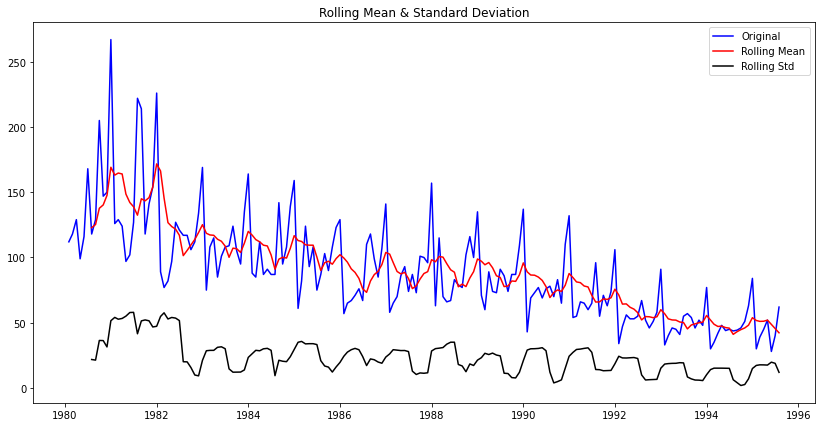

Results of Dickey-Fuller Test:
Test Statistic                  -1.873273
p-value                          0.344737
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [722]:

test_stationarity(df1['Rose'])

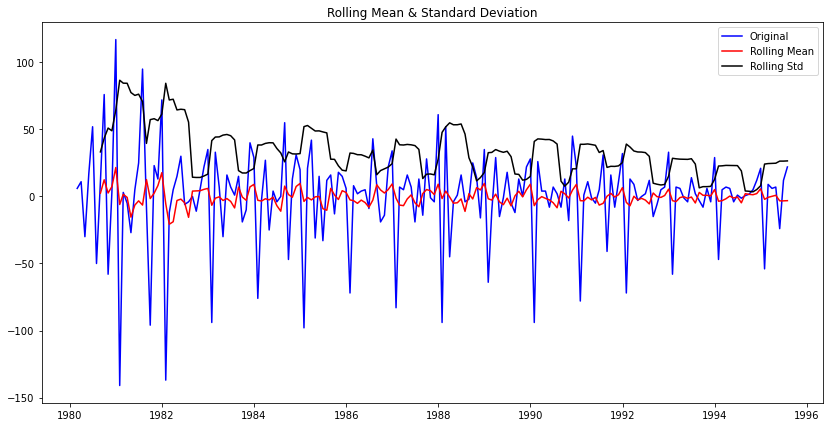

Results of Dickey-Fuller Test:
Test Statistic                -8.043385e+00
p-value                        1.821604e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [723]:

test_stationarity(df1['Rose'].diff().dropna())

In [724]:
#Building the model
full_model_autoARIMA = ARIMA(df1['Rose'], order=(0,1,2))

results_Arima_full_model = full_model_autoARIMA.fit()

print(results_Arima_full_model.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  187
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -882.826
Date:                Sun, 23 Aug 2020   AIC                           1771.653
Time:                        21:32:49   BIC                           1781.330
Sample:                    01-31-1980   HQIC                          1775.575
                         - 07-31-1995                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7107      0.055    -12.825      0.000      -0.819      -0.602
ma.L2         -0.1752      0.059     -2.991      0.003      -0.290      -0.060
sigma2       770.6498     54.278     14.198      0.0

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [725]:
test

,Rose
Time_Stamp,
1991-01-31,54.000000
1991-02-28,55.000000
1991-03-31,66.000000
1991-04-30,65.000000
1991-05-31,60.000000
1991-06-30,65.000000
1991-07-31,96.000000
1991-08-31,55.000000
1991-09-30,71.000000


In [726]:


pred_dynamic = results_Arima_full_model.get_prediction(start=pd.to_datetime('1991-01-31'), dynamic=True, full_results=True)

In [727]:
pred_dynamic_ci = pred_dynamic.conf_int()

In [728]:

pred95 = results_Arima_full_model.get_forecast(steps=24, alpha=0.05)
pred_ci_95 = pred95.conf_int()

In [729]:

forecast_fullmodel_autoarima = pred95.predicted_mean

In [730]:
pred_ci_95

,lower Rose,upper Rose
1995-08-31,-3.136375,105.683098
1995-09-30,-8.148743,105.134349
1995-10-31,-8.488295,105.473901
1995-11-30,-8.825835,105.811442
1995-12-31,-9.161400,106.147006
1996-01-31,-9.495023,106.480629
1996-02-29,-9.826737,106.812343
1996-03-31,-10.156575,107.142181
1996-04-30,-10.484569,107.470175
1996-05-31,-10.810748,107.796354


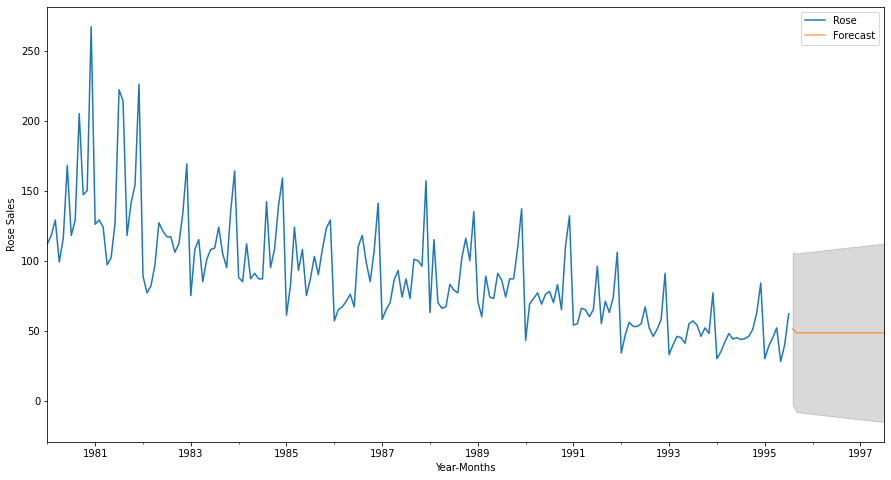

In [731]:

# plot the forecast along with the confidence band

axis = df1.plot(label='Observed', figsize=(15, 8))
forecast_fullmodel_autoarima.plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(forecast_fullmodel_autoarima.index, pred_ci_95['lower Rose'], pred_ci_95['upper Rose'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose Sales')
plt.legend(loc='best')
plt.show()

### For a ARIMA model, we can see the predictions with 95% confidence interval bands. The seasonality was unable to be captured. Let us try out a SARIMA model.

In [732]:

import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [733]:

SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [734]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:1145.4230827207355
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:976.437529638089
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:1116.0207869386352
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:969.6913635753215
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:962.8794540697528
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:955.5735408945786
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:1263.5369097383964
SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:1098.5554825918334
SARIMA(0, 1, 1)x(0, 0, 2, 12)7 - AIC:923.6314049383859
SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:1095.793632491873
SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:1054.743433094709
SARIMA(0, 1, 1)x(1, 0, 2, 12)7 - AIC:918.8573483294855
SARIMA(0, 1, 1)x(2, 0, 0, 12)7 - AIC:914.5982866535943
SARIMA(0, 1, 1)x(2, 0, 1, 12)7 - AIC:915.3332430461658
SARIMA(0, 1, 1)x(2, 0, 2, 12)7 - AIC:901.19882703279
SARIMA(0

In [735]:

SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",887.937509
53,"(1, 1, 2)","(2, 0, 2, 12)",889.871768
80,"(2, 1, 2)","(2, 0, 2, 12)",890.668798
69,"(2, 1, 1)","(2, 0, 0, 12)",896.518161
78,"(2, 1, 2)","(2, 0, 0, 12)",897.346444


In [736]:

import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = mod.fit()
print(results_SARIMA.summary())

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Sun, 23 Aug 2020   AIC                            887.938
Time:                                    21:33:45   BIC                            906.448
Sample:                                01-31-1980   HQIC                           895.437
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.452     -0.004      0.996    -372.161     370.476
ma.L2         -0.1573     29.764   

In [737]:
predicted_autoSARIMA = results_SARIMA.forecast(steps=len(test))
predicted_autoSARIMA

1991-01-31     62.867261
1991-02-28     70.541189
1991-03-31     77.356410
1991-04-30     76.208813
1991-05-31     72.747397
1991-06-30     79.230865
1991-07-31     79.217654
1991-08-31     73.262094
1991-09-30     82.073946
1991-10-31     74.672715
1991-11-30     97.779985
1991-12-31    113.975665
1992-01-31     63.852640
1992-02-29     72.747619
1992-03-31     76.286266
1992-04-30     76.309082
1992-05-31     73.267989
1992-06-30     77.875653
1992-07-31     78.175106
1992-08-31     73.870579
1992-09-30     80.680395
1992-10-31     74.166377
1992-11-30     92.981129
1992-12-31    105.115273
1993-01-31     67.856488
1993-02-28     73.412368
1993-03-31     76.699694
1993-04-30     76.360650
1993-05-31     74.259790
1993-06-30     77.817451
1993-07-31     77.917279
1993-08-31     74.624321
1993-09-30     79.649424
1993-10-31     75.153351
1993-11-30     88.662591
1993-12-31     97.766034
1994-01-31     69.694424
1994-02-28     74.309914
1994-03-31     76.519493
1994-04-30     76.408843


In [738]:

RMSE_autoSARIMA = mean_squared_error(test['Rose'],predicted_autoSARIMA,squared=False)
MAPE_autoSARIMA = MAPE(test['Rose'],predicted_autoSARIMA)

print('RMSE for the autofit SARIMA model:',RMSE_autoSARIMA,'\nMAPE for the autofit SARIMA model:',MAPE_autoSARIMA)

RMSE for the autofit SARIMA model: 26.992036801833013 
MAPE for the autofit SARIMA model: 46.75


In [739]:
temp_resultsDf = pd.DataFrame({'RMSE': [RMSE_autoSARIMA],'MAPE':[MAPE_autoSARIMA]}
                           ,index=['SARIMA(0, 1, 2)(2, 0, 2, 12)'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,RMSE,MAPE
"ARIMA(0,1,2)",37.368538,64.98
"SARIMA(0, 1, 2)(2, 0, 2, 12)",26.992037,46.75


In [740]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(df1['Rose'],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA_fullmodel = mod.fit()
print(results_SARIMA_fullmodel.summary())

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                      SARIMAX Results                                       
Dep. Variable:                                 Rose   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(2, 0, [1], 12)   Log Likelihood                -662.184
Date:                              Sun, 23 Aug 2020   AIC                           1336.368
Time:                                      21:33:45   BIC                           1354.894
Sample:                                  01-31-1980   HQIC                          1343.890
                                       - 07-31-1995                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7639      0.084     -9.071      0.000      -0.929      -0.599
ma.L2         -0.14

### Forecast the values for the next 24 months using the SARIMA model built and plot them along with confidence intervals. Also, plot the existing time series data in this graph.

In [741]:

pred_dynamic = results_SARIMA_fullmodel.get_prediction(start=pd.to_datetime('1980-01-31'), dynamic=True, full_results=True)

In [742]:

pred_dynamic_ci = pred_dynamic.conf_int()

In [743]:
pred95 = results_SARIMA_fullmodel.get_forecast(steps=24, alpha=0.05)
pred_ci_95 = pred95.conf_int()

In [744]:

forecast_fullmodel_autosarima = pred95.predicted_mean

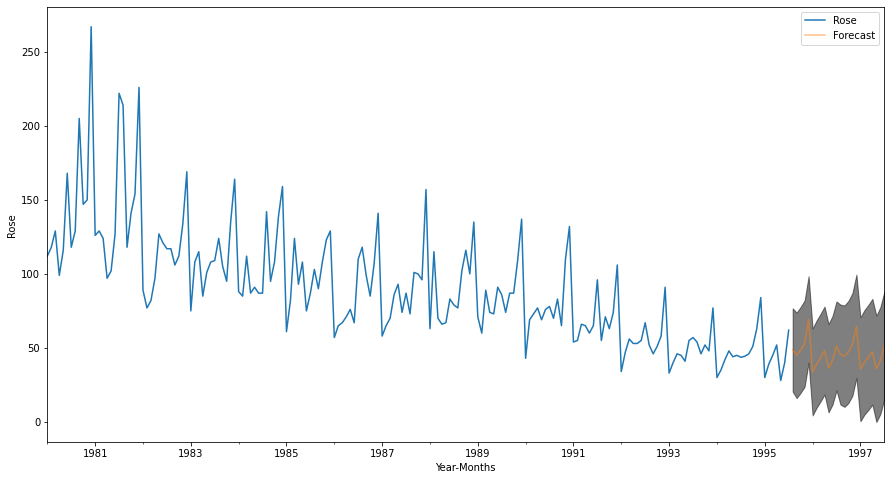

In [745]:

# plot the forecast along with the confidence band

axis = df1.plot(label='Observed', figsize=(15, 8))
forecast_fullmodel_autosarima.plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(forecast_fullmodel_autosarima.index, pred_ci_95['lower Rose'], pred_ci_95['upper Rose'], color='k', alpha=.5)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()

# Building the iterations of the models based on the ACF and PACF plots.


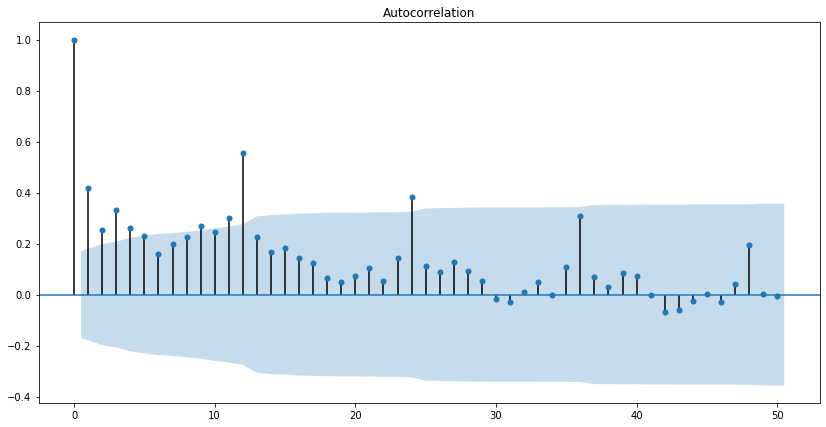

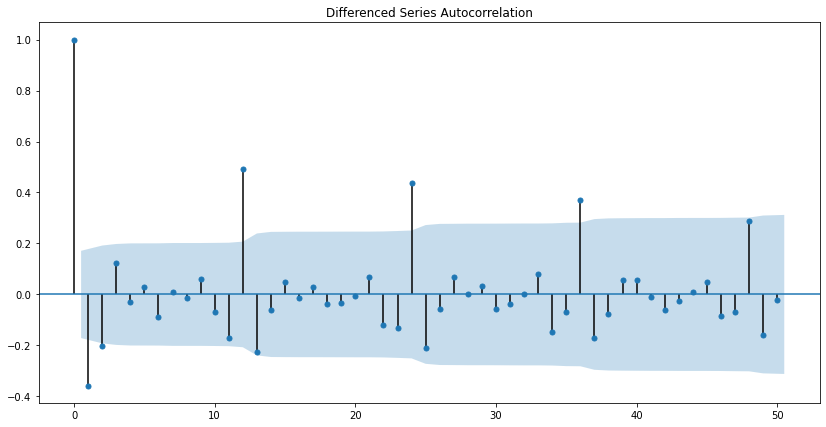

In [752]:
plot_acf(train['Rose'],lags=50)
plot_acf(train['Rose'].diff(1).dropna(),lags=50,title='Differenced Series Autocorrelation')
plt.show()

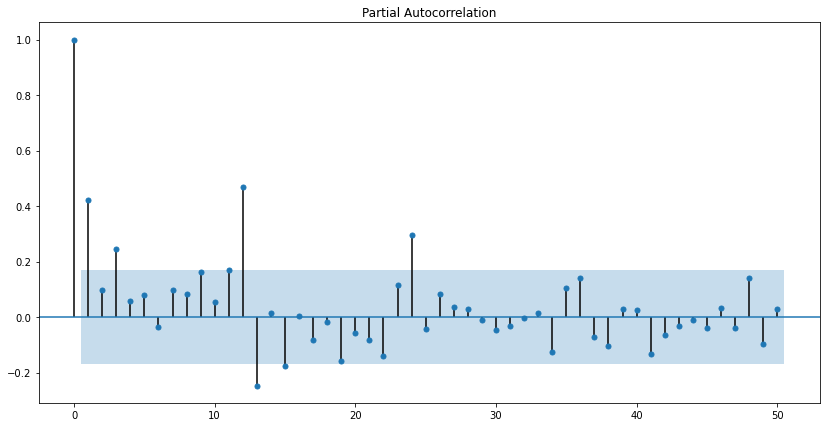

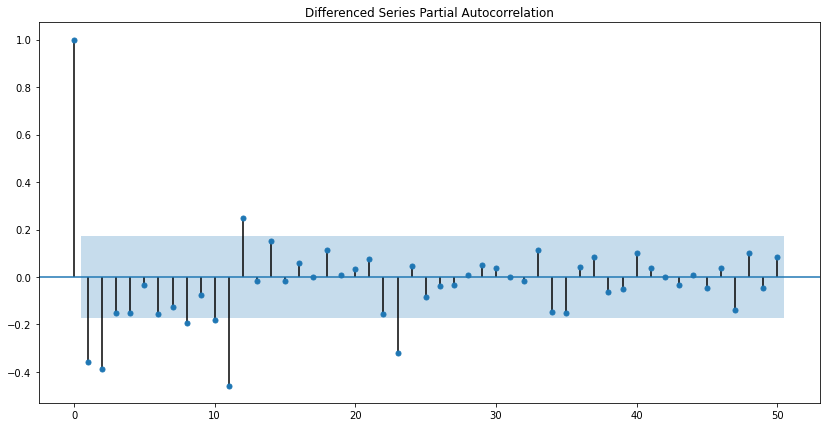

In [753]:
plot_pacf(train['Rose'],lags=50)
plot_pacf(train['Rose'].diff(1).dropna(),lags=50,title='Differenced Series Partial Autocorrelation')
plt.show()

In [754]:
mod = sm.tsa.statespace.SARIMAX(train['Rose'],freq='M',
                                order=(4,1,1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit(maxiter=100000)
print(results.summary())

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                      SARIMAX Results                                      
Dep. Variable:                                Rose   No. Observations:                  132
Model:             SARIMAX(4, 1, 1)x(1, 1, [], 12)   Log Likelihood                -445.457
Date:                             Sun, 23 Aug 2020   AIC                            904.913
Time:                                     21:45:34   BIC                            923.356
Sample:                                 01-31-1980   HQIC                           912.383
                                      - 12-31-1990                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1406      0.130      1.086      0.278      -0.113       0.395
ar.L2         -0.0685      

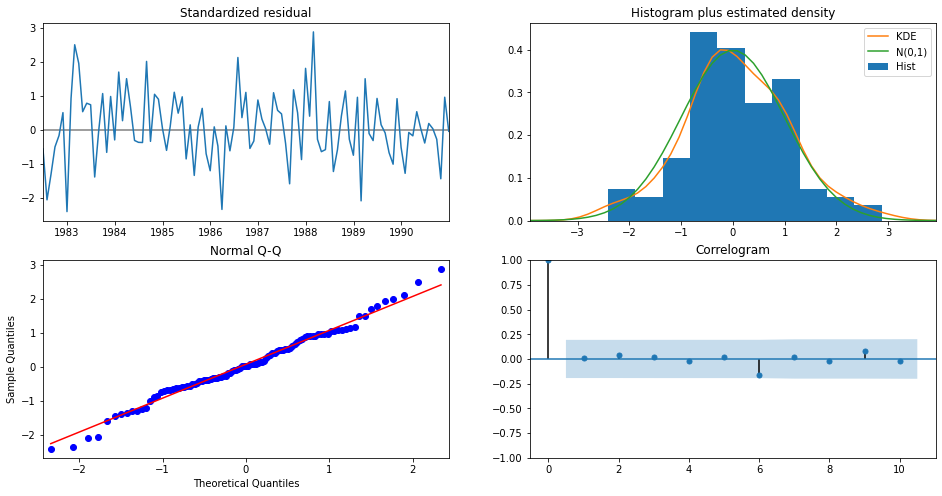

In [755]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [756]:
pred = results.get_forecast(steps=len(test))
pred.predicted_mean

1991-01-31     49.712573
1991-02-28     57.264947
1991-03-31     71.046385
1991-04-30     68.178203
1991-05-31     63.477542
1991-06-30     74.728154
1991-07-31     73.975941
1991-08-31     64.345825
1991-09-30     77.322909
1991-10-31     66.191324
1991-11-30    102.454390
1991-12-31    126.744308
1992-01-31     39.995314
1992-02-29     54.567283
1992-03-31     64.623593
1992-04-30     64.370541
1992-05-31     58.414448
1992-06-30     68.047093
1992-07-31     68.342619
1992-08-31     59.332981
1992-09-30     72.318734
1992-10-31     58.572301
1992-11-30     98.161599
1992-12-31    121.579741
1993-01-31     36.529296
1993-02-28     48.428853
1993-03-31     59.903342
1993-04-30     58.654692
1993-05-31     53.176551
1993-06-30     63.425168
1993-07-31     63.321813
1993-08-31     54.075955
1993-09-30     67.058407
1993-10-31     54.307464
1993-11-30     92.630443
1993-12-31    116.380477
1994-01-31     30.683382
1994-02-28     43.600344
1994-03-31     54.534924
1994-04-30     53.665304


In [757]:
rmse = mean_squared_error(test['Rose'],pred.predicted_mean,squared=False)
print(rmse)

15.60304001692957


In [758]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(4, 1, 1)(1, 1, 0, 12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(0,1,2)",37.368538,64.98
"SARIMA(0, 1, 2)(2, 0, 2, 12)",26.992037,46.75
"SARIMA(4, 1, 1)(1, 1, 0, 12)",15.603040,NaN


In [759]:
pred_dynamic = results_SARIMA_fullmodel.get_prediction(start=pd.to_datetime('1991-01-31'), dynamic=True, full_results=True)

In [760]:
pred_dynamic_ci = pred_dynamic.conf_int()

In [769]:
pred95 = results_SARIMA_fullmodel.get_forecast(steps=12, alpha=0.05)
pred_ci_95 = pred95.conf_int()

In [770]:
pred_ci_95

,lower Rose,upper Rose
1995-08-31,20.498311,76.734896
1995-09-30,16.070468,73.852927
1995-10-31,19.639059,77.656123
1995-11-30,23.797946,82.048671
1995-12-31,39.979667,98.463120
1996-01-31,4.395150,63.110407
1996-02-29,9.537714,68.483864
1996-03-31,13.839040,73.015183
1996-04-30,18.501752,77.906996
1996-05-31,6.485491,66.118957


In [771]:
forecast_fullmodel_autosarima = pred95.predicted_mean

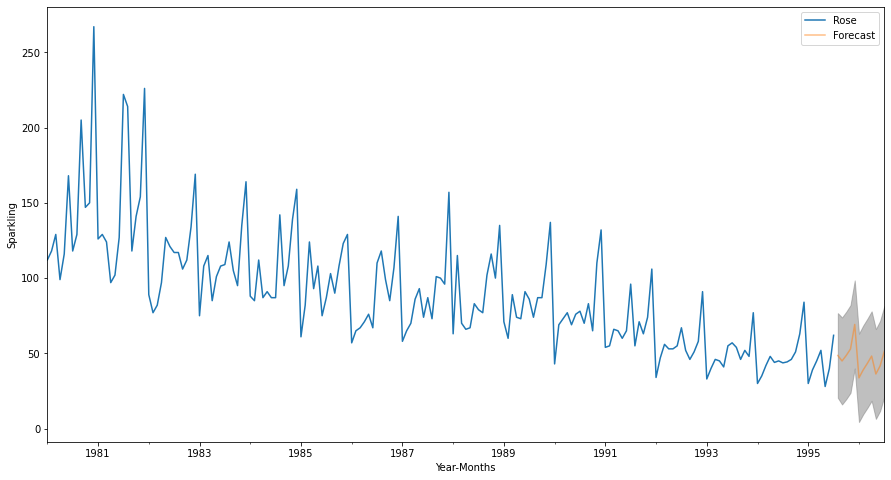

In [772]:
# plot the forecast along with the confidence band

axis = df1.plot(label='Observed', figsize=(15, 8))
forecast_fullmodel_autosarima.plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(forecast_fullmodel_autosarima.index, pred_ci_95['lower Rose'], pred_ci_95['upper Rose'], color='gray', alpha=.5)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()